<a href="https://colab.research.google.com/github/Refath/1600/blob/master/Computational_Physics_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pendulum Period $\tau_{est}\approx 6 \text{ au}$. Thus, $T=4\sqrt{\frac{L}{g}}\tau_{est}=24\sqrt{\frac{L}{g}}$ for $\theta_i=0.5 \text{ rad}$.

In [ ]:
def EulerStep(x0,v0,accel,dt):                 # function for one Euler step of size dt with accel argument <-- the name of a function of x!
    a0 = accel(x0)                             # compute acceleration at initial time
    return x0 + v0*dt, v0 + a0*dt              # return x, v

def ImpEulerStep(x0,v0,accel,dt):              # function for one improved Euler step of size dt with accel function
    xmid, vmid = EulerStep(x0,v0,accel,0.5*dt) # the midpoint values are estimated using an Euler step of half size
    amid = accel(xmid)
    return x0 + vmid*dt, v0 + amid*dt          # return x, v

4.50703414486278

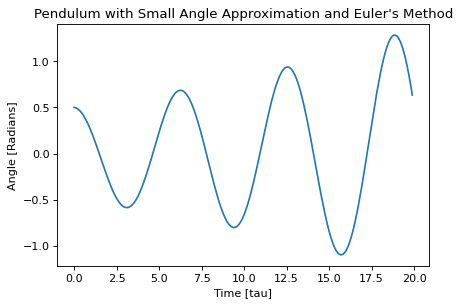

In [ ]:
import matplotlib.pyplot as plt # IMPORT PLOTTING LIBRARY (OPTIONAL)
import math # IMPORT MATH LIBRARY
import numpy as np

theta_i = 0.5 # INITIAL ANGLE SET TO 0.5 RADIANS
omega_i = 0 # PENDULUM RELEASED FROM REST
alpha_i = -1*theta_i # INITIAL ANGULAR ACCELERATION

dt = 0.1 # TIME STEP FOR TAU

ts = [0] # INITIALIZE TAU LIST
thetas, omegas = [theta_i], [omega_i] # INITIALIZE ANGULAR VELOCITY LIST

t = 0 # INITIALIZE VALUE FOR TAU
theta = theta_i # INITIALIZE VALUE FOR THETA
omega = omega_i # INITIALIZE VALUE FOR ANGULAR VELOCITY

def alpha(x):                # const. dimless acceleration
    return -x

for i in range(200):
    theta_next, omega_next = EulerStep(thetas[i], omegas[i], alpha, dt)
    
    omegas.append(omega_next) # UPDATE LIST OF ANGLES
    thetas.append(theta_next) # UPDATE ANGULAR VELOCITIES
    ts.append(t) # UPDATE ANGULAR ACCELERATIONS

    t += dt # TAU STEP

# # THIS PLOT IS FOR DEBUGGING/VISUALIZATION PURPOSES (OPTIONAL)

plt.rcParams['figure.dpi'] = 80 # INCREASE PLOT RESOLUTION
plt.xlabel("Time [tau]") # ADD X-AXIS
plt.ylabel("Angle [Radians]") # ADD Y-AXIS
plt.title("Pendulum with Small Angle Approximation and Euler's Method") # ADD TITLE
plt.plot(ts,thetas) # PLOT ANGLE AGAINST DIMENSIONLESS TIME

def rpdiff(est, true):
    temp = (est-true)/true
    return 100*np.abs(temp)

rpdiff(1.5000000000000002*4, 2*math.pi)

The Period is 6.199999999999986 [au]


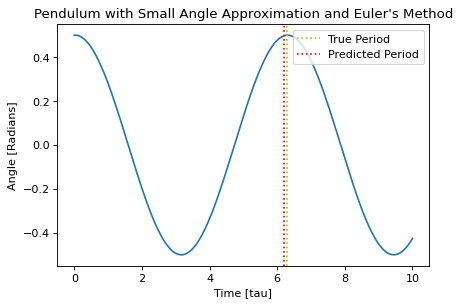

In [ ]:
import matplotlib.pyplot as plt # IMPORT PLOTTING LIBRARY (OPTIONAL)
import math # IMPORT MATH LIBRARY

theta_i = 0.5 # INITIAL ANGLE SET TO 0.5 RADIANS
omega_i = 0 # PENDULUM RELEASED FROM REST
alpha_i = -1*theta_i # INITIAL ANGULAR ACCELERATION

dt = 0.05 # TIME STEP FOR TAU

ts = [0] # INITIALIZE TAU LIST
thetas = [theta_i] # INITIALIZE ANGLES LIST
omegas = [omega_i] # INITIALIZE ANGULAR VELOCITY LIST
alphas = [alpha_i] # INITIALIZE ANGULAR ACCELERATION LIST

t = 0 # INITIALIZE VALUE FOR TAU
theta = theta_i # INITIALIZE VALUE FOR THETA
omega = omega_i # INITIALIZE VALUE FOR ANGULAR VELOCITY
alpha = alpha_i # INITIALIZE VALUE FOR ANGULAR ACCELERATION

while t < 10: # NOT SURE WHAT QUARTER PERIOD MEANS

    theta += omega*dt # EULER STEP FOR ANGLE
    omega += -1*(theta)*dt # EULER STEP FOR ANGULAR VELOCITY
    alpha = -1*(theta) # EULER STEP FOR ANGULAR ACCLERATIOn
    t += dt # TAU STEP
    
    omegas.append(omega) # UPDATE LIST OF ANGLES
    thetas.append(theta) # UPDATE ANGULAR VELOCITIES
    ts.append(t) # UPDATE ANGULAR ACCELERATIONS

# THIS PLOT IS FOR DEBUGGING/VISUALIZATION PURPOSES (OPTIONAL)

plt.rcParams['figure.dpi'] = 80 # INCREASE PLOT RESOLUTION
plt.xlabel("Time [tau]") # ADD X-AXIS
plt.ylabel("Angle [Radians]") # ADD Y-AXIS
plt.title("Pendulum with Small Angle Approximation and Euler's Method") # ADD TITLE
plt.plot(ts,thetas) # PLOT ANGLE AGAINST DIMENSIONLESS TIME

theta_period_val = [] # LIST TO HOLD LOCATIONS OF PERIOD

for i in range(0, len(thetas)): # FOR LOOP TO FIND PERIOD
  if round(thetas[i],2)==0.5 and i > 10: # LOCATE ALL 0.5 RAD ANGLES 
    theta_period_val.append(i) # APPEND LOCATIONS TO PERIOD LIST

period = ts[theta_period_val[0]] # TAKE FIRST VALUE FROM PERIOD LIST
print("The Period is", period, "[au]") # PRINT PERIOD

plt.axvline(x=2*math.pi, color='y', linestyle=':', label = "True Period") # LINE FOR TRUE PERIOD
plt.axvline(x=period, color='r', linestyle=':', label = "Predicted Period") # LINE FOR PREDICTED PERIOD
plt.legend(loc="upper right") # ADD LEGEND
plt.show() # SHOW PLOT

The Period is 6.599634196414681 [au]


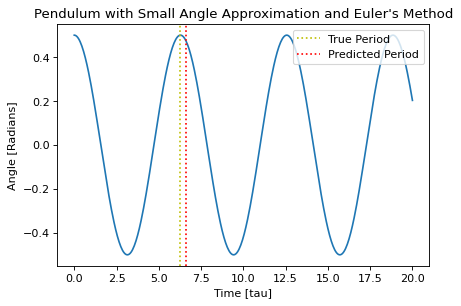

In [ ]:
import matplotlib.pyplot as plt # IMPORT PLOTTING LIBRARY (OPTIONAL)
import math # IMPORT MATH LIBRARY

theta_i = 0.5 # INITIAL ANGLE SET TO 0.5 RADIANS
omega_i = 0 # PENDULUM RELEASED FROM REST
alpha_i = -1*theta_i # INITIAL ANGULAR ACCELERATION

dt = 0.05 # TIME STEP FOR TAU

ts = [0] # INITIALIZE TAU LIST
thetas = [theta_i] # INITIALIZE ANGLES LIST
omegas = [omega_i] # INITIALIZE ANGULAR VELOCITY LIST
alphas = [alpha_i] # INITIALIZE ANGULAR ACCELERATION LIST

t = 0 # INITIALIZE VALUE FOR TAU
theta = theta_i # INITIALIZE VALUE FOR THETA
omega = omega_i # INITIALIZE VALUE FOR ANGULAR VELOCITY
alpha = alpha_i # INITIALIZE VALUE FOR ANGULAR ACCELERATION

while t < 20: # NOT SURE WHAT QUARTER PERIOD MEANS

    theta_mid = theta + omega*(dt/2) # IMPROVED EULER STEP FOR ANGLE
    alpha_mid = -1*(theta_mid) # IMPROVED EULER STEP FOR ANGULAR ACCLERATION
    omega_mid = omega + alpha_mid*(dt/2) # IMPORVED EULER STEP FOR ANGULAR VELOCITY
    
    theta += omega_mid*dt # IMPROVED EULER STEP
    omega += alpha_mid*dt # IMPROVED EULER ANGLE STEP
    t += dt # TAU STEP

    omegas.append(omega) # UPDATE LIST OF ANGLES
    thetas.append(theta) # UPDATE ANGULAR VELOCITIES
    ts.append(t) # UPDATE ANGULAR ACCELERATIONS

# THIS PLOT IS FOR DEBUGGING/VISUALIZATION PURPOSES (OPTIONAL)

plt.rcParams['figure.dpi'] = 80 # INCREASE PLOT RESOLUTION
plt.xlabel("Time [tau]") # ADD X-AXIS
plt.ylabel("Angle [Radians]") # ADD Y-AXIS
plt.title("Pendulum with Small Angle Approximation and Euler's Method") # ADD TITLE
plt.plot(ts,thetas) # PLOT ANGLE AGAINST DIMENSIONLESS TIME

theta_period_val = [] # LIST TO HOLD LOCATIONS OF PERIOD

for i in range(0, len(thetas)): # FOR LOOP TO FIND PERIOD
  if round(thetas[i],2)==0.5 and i > 10: # LOCATE ALL 0.5 RAD ANGLES 
    theta_period_val.append(i) # APPEND LOCATIONS TO PERIOD LIST

period = ts[theta_period_val[0]] # TAKE FIRST VALUE FROM PERIOD LIST

T = period - theta/omega_mid # INTERPOLATE BACK IF OVERSHOT

print("The Period is", T, "[au]") # PRINT PERIOD
plt.axvline(x=2*math.pi, color='y', linestyle=':', label = "True Period") # LINE FOR TRUE PERIOD
plt.axvline(x=T, color='r', linestyle=':', label = "Predicted Period") # LINE FOR PREDICTED PERIOD
plt.legend(loc="upper right") # ADD LEGEND
plt.show() # SHOW PLOT